In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('road_accident.csv')

In [24]:
data.head()


,Date,Time,Day_of_Week,Barangay,Latitude,Longitude,Weather,Road_Condition,Vehicle_Type,Driver_Age,Driver_Gender,Accident_Type,Injuries,Fatalities
0,04/08/2021,21:15,Wednesday,I-C (Bagong Bayan),14.071215,121.322198,Sunny,Dry,Motorcycle,44,Male,Head-on collision,4,0
1,20/08/2021,7:15,Friday,Santa Veronica (Bae),14.080453,121.330692,Sunny,Dry,Bicycle,38,Male,Rear-end collision,1,1
2,05/09/2023,3:32,Tuesday,I-A (Sambat),14.080712,121.301354,Rainy,Wet,Car,29,Female,Side-impact collision,2,0
3,14/12/2021,15:08,Tuesday,VI-A (Mavenida),14.047567,121.298669,Rainy,Wet,Motorcycle,50,Male,Side-impact collision,5,0
4,05/02/2020,13:01,Wednesday,San Lucas 2 (Malinaw),14.080015,121.329899,Rainy,Wet,Motorcycle,27,Male,Head-on collision,2,0


In [25]:
data.columns




Index(['Date', 'Time', 'Day_of_Week', 'Barangay', 'Latitude', 'Longitude',
       'Weather', 'Road_Condition', 'Vehicle_Type', 'Driver_Age',
       'Driver_Gender', 'Accident_Type', 'Injuries', 'Fatalities'],
      dtype='object')

In [26]:
data.shape

(1500, 14)

In [27]:
# Define features and target (replace 'accident_type' with actual target column name)
X = data.drop('Accident_Type', axis=1)
y = data['Accident_Type']

In [28]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [29]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [30]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Driver_Age', 'Injuries', 'Fatalities'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Date', 'Time', 'Day_of_Week', 'Barangay', 'Weather', 'Road_Condition',
       'Vehicle_Type', 'Driver_Gender'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [33]:
y_pred = model.predict(X_test)

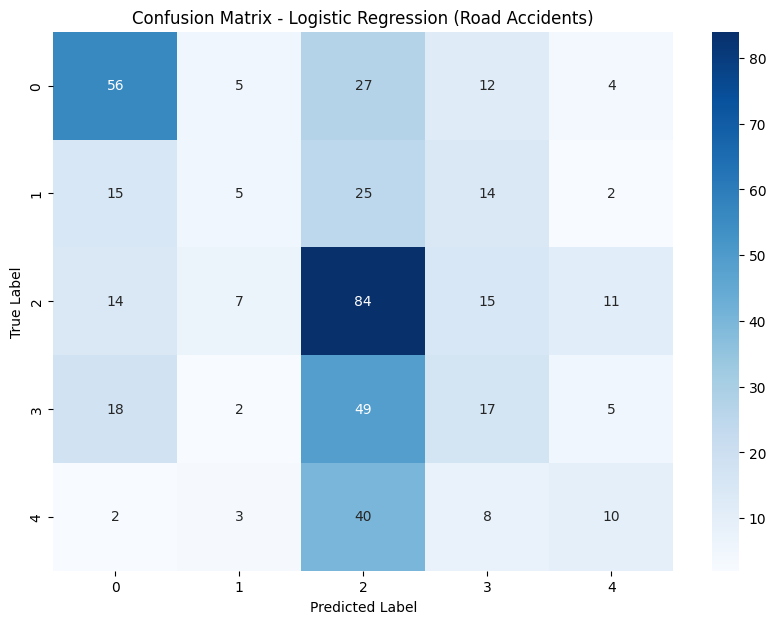

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Road Accidents)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [36]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                         precision    recall  f1-score   support

      Head-on collision       0.53      0.54      0.54       104
    Pedestrian accident       0.23      0.08      0.12        61
     Rear-end collision       0.37      0.64      0.47       131
  Side-impact collision       0.26      0.19      0.22        91
Single vehicle accident       0.31      0.16      0.21        63

               accuracy                           0.38       450
              macro avg       0.34      0.32      0.31       450
           weighted avg       0.36      0.38      0.35       450



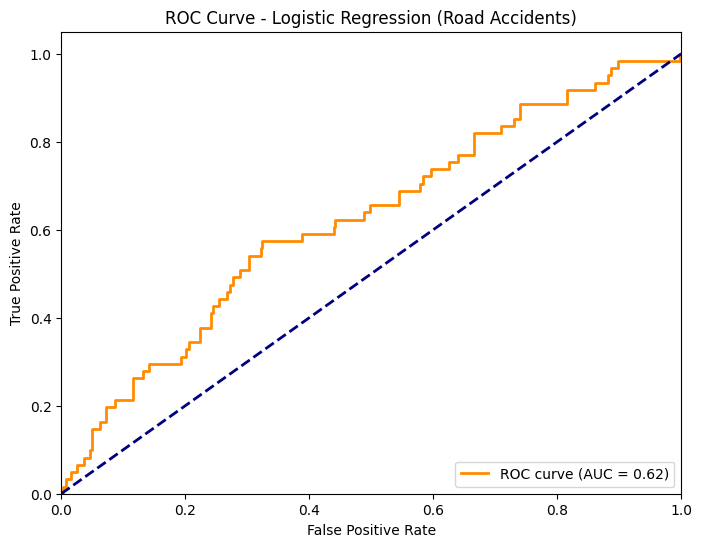

In [37]:
y_prob = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Road Accidents)')
plt.legend(loc="lower right")
plt.show()

In [38]:
joblib.dump(model, 'lr_road_accident.pkl')
print("Model saved as 'lr_road_accident.pkl'")

Model saved as 'lr_road_accident.pkl'
